In [1]:
import numpy as np
import pandas as pd
from scipy import signal
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
%matplotlib inline

## Signals.

A signal describes how a quantity varies over time and/or space. In essence, it is a function with one or more independent variables such as time (t) or space (u, v) where u and v represent the x and y coordinates in some specified frame.

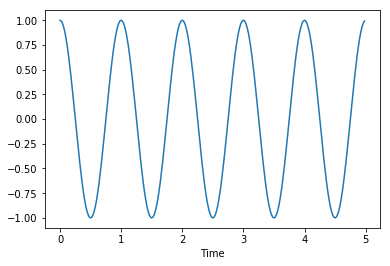

In [2]:
# Example of a continuous signal that changes over time.
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t = np.arange(0.0, 5.0, 0.02)
plt.xlabel('Time')
plt.plot(t, np.cos(2*np.pi*t))

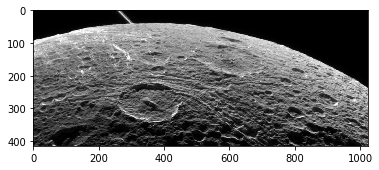

In [3]:
# Example of a 'discrete' signal that changes over spatial coordinates.
img = plt.imread('data/moon.jpg')
plt.imshow(img, 'gray')

Text(0.5,0,'Time')

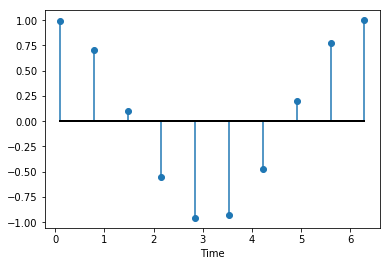

In [4]:
# Example of a discrete signal that changes over time.
x = np.linspace(0.1, 2*np.pi, 10)
markerline, stemlines, baseline = plt.stem(x, np.cos(x))
plt.setp(baseline, 'color', 'black', 'linewidth', 2)
plt.xlabel('Time')

(-2, 2)

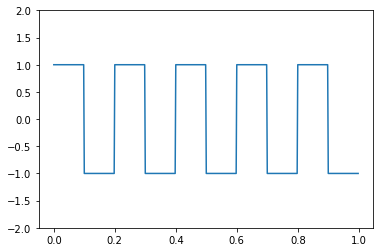

In [5]:
# Example of a, yet another, periodic signal
# The period of the signal is the interval over which it repeats
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)

## Sampling.

A discrete time signal x[t] can be obtained by sampling a continuous time x(t). In the example below the spoken word 'six' ws stored digitally with a sampling rte of 44,100 and a small segment was plotted. The part displayed corresponds, roughly, to the pronunciation of the vowel 'i' which does display some periodic properties.

Text(0.5,1,'Spoken Word: Six')

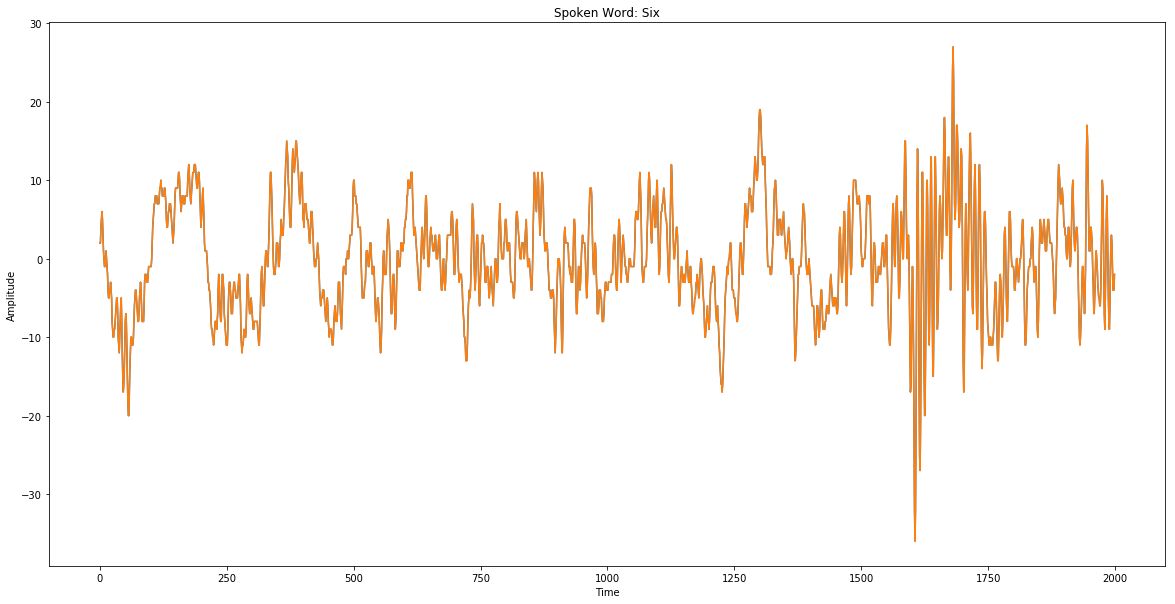

In [6]:
# read audio samples
# Audio represents the word 'six'
input_data = read('data/Six Sample.wav')
audio = input_data[1]
plt.figure(figsize=(20,10))
plt.plot(audio[14000:16000])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Spoken Word: Six")

## Sinusoidal Signals.

Any signal can be described by a weighted sum of sinusoids.  

\begin{equation*}
x(t) = \sum_{n=-\infty}^{\infty} x[n]sinc\left( \frac{t-nT_{s}}{T_{s}} \right)
\end{equation*}

where sinc is the sine cardinal, x(t) represents the continuous signal at time t, x[n] represents the discrete signal sampled at time t, n is the total number of samples and $T_{s}$ represents the interval over which each sample is taken. Note that n sets the order of the sequence of samples and is not necessarily interpreted as 'time'.  

The `sinc` function is depicted below.

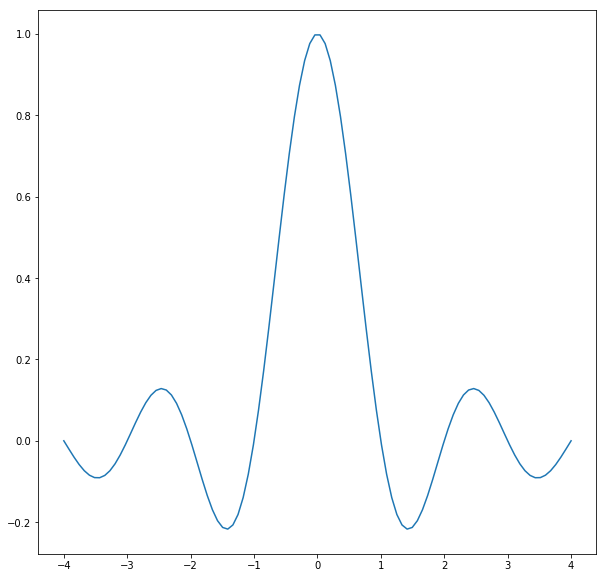

In [7]:
x = np.linspace(-4, 4, 100)
plt.figure(figsize=(10,10))
plt.plot(x, np.sinc(x))

## Discrete-time Signals.

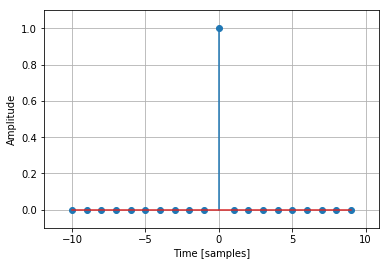

In [8]:
# Delta signal
imp = signal.unit_impulse(20, 'mid')
plt.stem(np.arange(-10, 10), imp)
plt.margins(0.1, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)

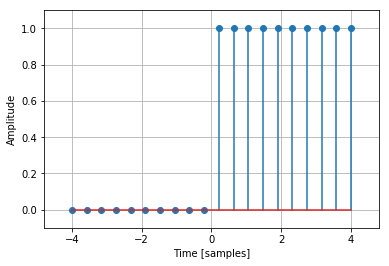

In [9]:
# Unit step signal
def step(x):
    return 1 * (x > 0)

x = np.linspace(-4, 4, 20)
plt.stem(x, step(x))
plt.margins(0.1, 0.1)
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)

Text(0.5,0,'Sample')

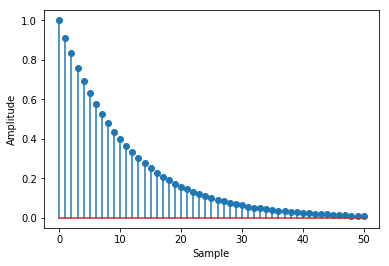

In [10]:
# Exponential decay signal
M = 51
tau = -(M-1) / np.log(0.01)
window2 = signal.exponential(M, 0, tau, False)
plt.stem(window2)
plt.ylabel("Amplitude")
plt.xlabel("Sample")

<StemContainer object of 3 artists>

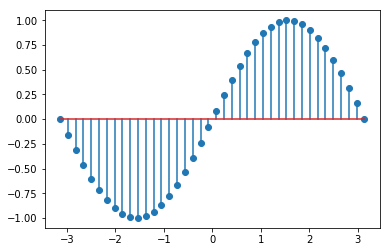

In [11]:
# Sinusoidal signal
x = np.linspace(-np.pi, np.pi, 40)
plt.stem(x, np.sin(x))

## Basic Signal Processing.

The examples shown below are not intended to be the fastest-performing algorithms possible but aim to give some insight how one or more input signals can be combined to produce an output signal.

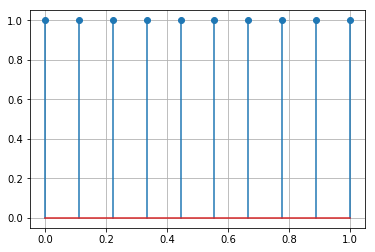

In [12]:
def add_signal(a, b):
    return a + b

x = np.linspace(0, 1, 10) # coordinates for x-axis
x0 = np.linspace(0, 1, 10)
x1 = np.linspace(1, 0, 10)
y = []

for i in range(len(x0)):
    y.append(add_signal(x0[i], x1[i]))

plt.stem(x, y)
plt.grid(True)

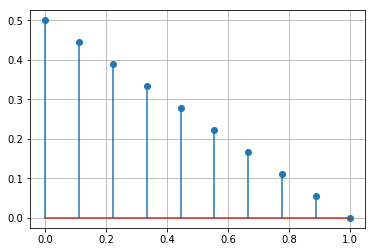

In [13]:
def multiply_signal(s, mult):
    return s * mult

x = np.linspace(0, 1, 10) # coordinates for x-axis
x0 = np.linspace(1, 0, 10) # signal values
y = [] # output signal

for i in range(len(x0)):
    y.append(multiply_signal(x0[i], 0.5))
    
plt.stem(x, y)
plt.grid(True)

In [14]:
def delay_signal(current, buffer, delay):
    previous = 0
    if len(buffer) == 0 or len(buffer) < delay:
        buffer.append(current)
    else:
        buffer.append(current)
        previous = buffer.pop(0)
    return previous

buffer = []
delay = 2
print('Signal time 0: input =', 5, 'output =', delay_signal(5, buffer, delay))
print('Signal time 1: input =', 4, 'output =', delay_signal(4, buffer, delay))
print('Signal time 2: input =', 3, 'output =', delay_signal(3, buffer, delay))
print('Signal time 3: input =', 2, 'output =', delay_signal(2, buffer, delay))

Signal time 0: input = 5 output = 0
Signal time 1: input = 4 output = 0
Signal time 2: input = 3 output = 5
Signal time 3: input = 2 output = 4


<StemContainer object of 3 artists>

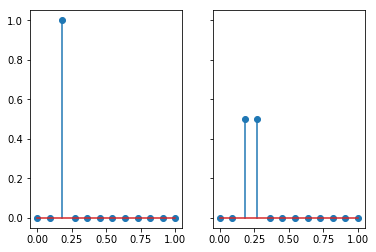

In [15]:
# Calculate a moving average using add_signal and delay_signal

x = np.linspace(0, 1, 12) # coordinates for x-axis

buffer = []
signal = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
out =[]

for i in range(len(signal)):
    out.append((signal[i] + delay_signal(signal[i], buffer, 1))/2)

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.stem(x, signal)
ax2.stem(x, out)

<StemContainer object of 3 artists>

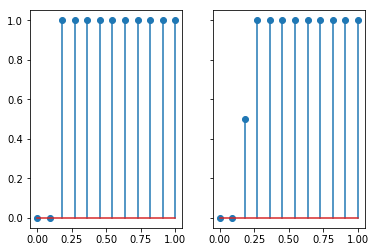

In [16]:
# Calculate a moving average using add_signal and delay_signal

buffer = []
signal = [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
out = []

for i in range(len(signal)):
    out.append((signal[i] + delay_signal(signal[i], buffer, 1))/2)

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.stem(x, signal)
ax2.stem(x, out)

<StemContainer object of 3 artists>

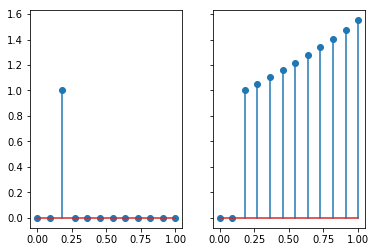

In [17]:
# add the current value of the signal to a scaled version of the previous signal

x = np.linspace(0, 1, 12) # coordinates for x-axis
buffer = []
signal = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
out = []
alpha = 1.05
y_current = 0

for i in range(len(signal)):
    y_current = signal[i] + alpha*y_current
    out.append(y_current)

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.stem(x, signal)
ax2.stem(x, out)

### Moving Average of Temperature Measurements in Vienna.

In [18]:
df = pd.read_csv('data/Vienna.csv')
df_temp = df[['DATE', 'TAVG']]
df_temp = df_temp.sort_values(by=['DATE'])
for column in df_temp.columns:
    df_temp[column].interpolate(method='linear', inplace=True, limit_direction='both')
df_temp.head()

,DATE,TAVG
6,1856,49.8
7,1857,50.5
8,1858,48.3
9,1859,51.5
10,1860,49.2


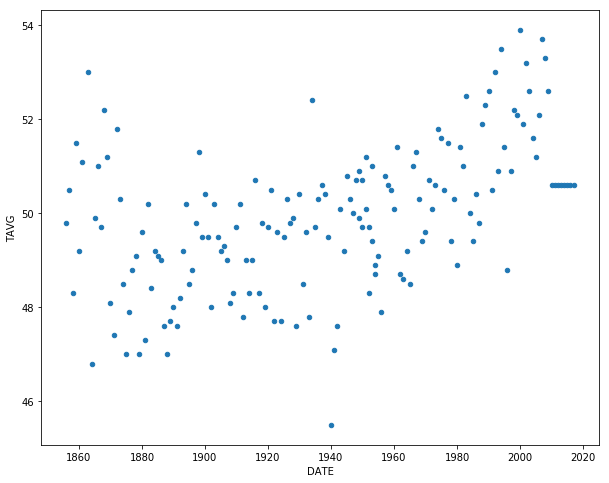

In [19]:
df_temp.plot.scatter('DATE', 'TAVG', figsize=(10,8))

In [20]:
df_temp['MA_10'] = df_temp.TAVG.rolling(10).mean()

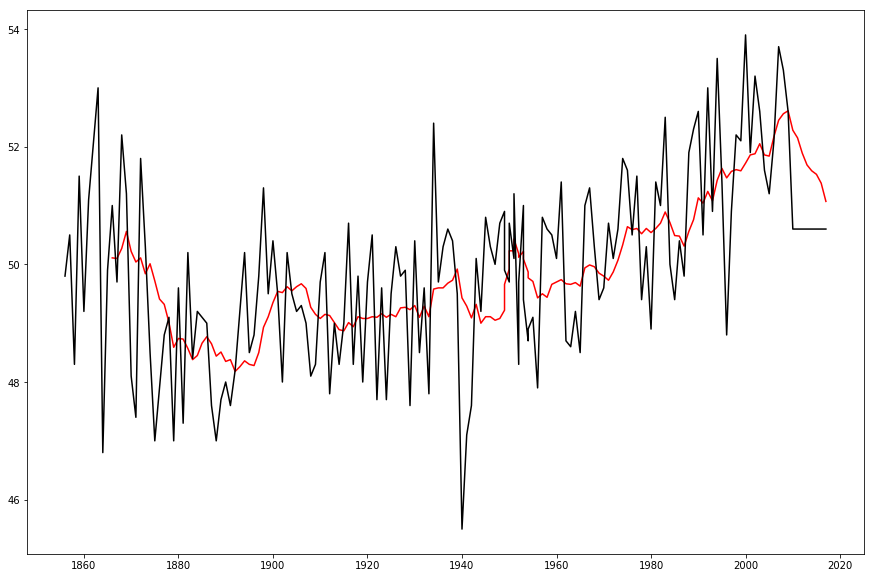

In [21]:
plt.figure(figsize=(15,10))
plt.grid=True
plt.plot(df_temp.DATE, df_temp.MA_10, color='red')
plt.plot(df_temp.DATE, df_temp.TAVG, color='black')